In [1]:
import pandas as pd
import pycountry
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from country_list import countries_for_language
from sklearn.cluster import KMeans
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 50)

# Loading data to DataFrames

In [10]:
gdp_raw = pd.read_excel(f'Demographic Data/GDP by country.xls', skiprows=3)
gdp_raw.drop(gdp_raw.iloc[:,2:44].columns, axis=1, inplace=True)
gdp_raw.drop(gdp_raw.iloc[:,-1:].columns,axis=1, inplace=True)
gdp = pd.melt(gdp_raw, id_vars=['Country Name', 'Country Code'], value_vars=gdp_raw.iloc[:,2:].columns, var_name='year', value_name='gdp')
gdp.sort_values(by=['Country Name', 'year'], inplace=True)
gdp.reset_index(inplace=True)
gdp.drop(['index'], axis=1, inplace=True)

In [11]:
exp_on_education_raw = pd.read_excel(f'Demographic Data/Govt Exp on Education.xls', skiprows=3)
exp_on_education_raw.drop(exp_on_education_raw.iloc[:,2:44].columns, axis=1, inplace=True)
exp_on_education_raw
exp_on_education_raw.drop(exp_on_education_raw.iloc[:,-1:].columns,axis=1, inplace=True)
exp_on_education = pd.melt(exp_on_education_raw, id_vars=['Country Name', 'Country Code'], value_vars=exp_on_education_raw.iloc[:,2:].columns, var_name='year', value_name='govt_exp_ter_edu')
exp_on_education.sort_values(by=['Country Name', 'year'], inplace=True)
exp_on_education.reset_index(inplace=True)
exp_on_education.drop(['index'], axis=1, inplace=True)

In [12]:
literacy_rate_raw = pd.read_excel(f'Demographic Data/Literacy Rate.xls', skiprows=3)
literacy_rate_raw.drop(literacy_rate_raw.iloc[:,2:44].columns, axis=1, inplace=True)
literacy_rate_raw.drop(literacy_rate_raw.iloc[:,-1:].columns,axis=1, inplace=True)
literacy_rate = pd.melt(literacy_rate_raw, id_vars=['Country Name', 'Country Code'], value_vars=literacy_rate_raw.iloc[:,2:].columns, var_name='year', value_name='literacy_rate')
literacy_rate.sort_values(by=['Country Name', 'year'], inplace=True)
literacy_rate.reset_index(inplace=True)
literacy_rate.drop(['index'], axis=1, inplace=True)

In [13]:
total_govt_exp_raw = pd.read_excel(f'Demographic Data/Total Govt Exp on Education.xls', skiprows=3)
total_govt_exp_raw.drop(total_govt_exp_raw.iloc[:,2:44].columns, axis=1, inplace=True)
total_govt_exp_raw.drop(total_govt_exp_raw.iloc[:,-1:].columns,axis=1, inplace=True)
total_govt_exp = pd.melt(total_govt_exp_raw, id_vars=['Country Name', 'Country Code'], value_vars=total_govt_exp_raw.iloc[:,2:].columns, var_name='year', value_name='govt_exp_total')
total_govt_exp.sort_values(by=['Country Name', 'year'], inplace=True)
total_govt_exp.reset_index(inplace=True)
total_govt_exp.drop(['index'], axis=1, inplace=True)

In [14]:
avg_class_size_raw = pd.read_excel(f'Demographic Data/Average Class Size.xls', skiprows=3)
avg_class_size_raw.drop(avg_class_size_raw.iloc[:,2:44].columns, axis=1, inplace=True)
avg_class_size_raw.drop(avg_class_size_raw.iloc[:,-1:].columns,axis=1, inplace=True)
avg_class_size = pd.melt(avg_class_size_raw, id_vars=['Country Name', 'Country Code'], value_vars=avg_class_size_raw.iloc[:,2:].columns, var_name='year', value_name='avg_class_size')
avg_class_size.sort_values(by=['Country Name', 'year'], inplace=True)
avg_class_size.reset_index(inplace=True)
avg_class_size.drop(['index'], axis=1, inplace=True)

In [15]:
enrollment_rate_raw = pd.read_excel(f'Demographic Data/Enrollment.xls', skiprows=3)
enrollment_rate_raw.drop(enrollment_rate_raw.iloc[:,2:44].columns, axis=1, inplace=True)
enrollment_rate_raw.drop(enrollment_rate_raw.iloc[:,-1:].columns,axis=1, inplace=True)
enrollment_rate = pd.melt(enrollment_rate_raw, id_vars=['Country Name', 'Country Code'], value_vars=enrollment_rate_raw.iloc[:,2:].columns, var_name='year', value_name='enrollment_rate')
enrollment_rate.sort_values(by=['Country Name', 'year'], inplace=True)
enrollment_rate.reset_index(inplace=True)
enrollment_rate.drop(['index'], axis=1, inplace=True)

In [16]:
gdp_per_capita = pd.read_excel(f'Demographic Data/GDP_per_capita.xls', skiprows=3)
gdp_per_capita.drop(gdp_per_capita.iloc[:,2:44].columns, axis=1, inplace=True)
gdp_per_capita.drop(gdp_per_capita.iloc[:,-1:].columns,axis=1, inplace=True)
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=['Country Name','Country Code'], value_vars=gdp_per_capita.iloc[:,2:].columns, var_name='year', value_name='gdp_per_capita')
gdp_per_capita.sort_values(by=['Country Name', 'year'], inplace=True)
gdp_per_capita.reset_index(inplace=True)
gdp_per_capita.drop(['index'], axis=1, inplace=True)

In [17]:
govt_exp_student = pd.read_excel(f'Demographic Data/gov_spend_per_student2.xls', skiprows=3)
govt_exp_student.drop(govt_exp_student.iloc[:,2:44].columns, axis=1, inplace=True)
govt_exp_student.drop(govt_exp_student.iloc[:,-1:].columns,axis=1, inplace=True)
govt_exp_student = pd.melt(govt_exp_student, id_vars=['Country Name','Country Code'], value_vars=govt_exp_student.iloc[:,2:].columns, var_name='year', value_name='govt_exp_per_student')
govt_exp_student.sort_values(by=['Country Name', 'year'], inplace=True)
govt_exp_student.reset_index(inplace=True)
govt_exp_student.drop(['index'], axis=1, inplace=True)

In [18]:
tert_grad_rate = pd.read_csv(f'Demographic Data/tert_grad_rate.csv')
tert_grad_rate.sort_values(['LOCATION', 'TIME'], inplace=True)
tert_grad_rate.reset_index(inplace=True)
tert_grad_rate.drop(['index'], axis=1, inplace=True)
tert_grad_rate = tert_grad_rate[['LOCATION','TIME','Value']]
tert_grad_rate = tert_grad_rate.groupby(by=['LOCATION','TIME']).mean()

In [19]:
sec_grad_rate = pd.read_csv(f'Demographic Data/sec_grad_rate.csv')
sec_grad_rate.sort_values(['LOCATION', 'TIME'], inplace=True)
sec_grad_rate.reset_index(inplace=True)
sec_grad_rate.drop(['index'], axis=1, inplace=True)
sec_grad_rate = sec_grad_rate[['LOCATION','TIME','Value']]
sec_grad_rate = sec_grad_rate.groupby(by=['LOCATION','TIME']).mean()

In [20]:
int_mobility = pd.read_csv(f'Demographic Data/int_mobility.csv')
int_mobility = int_mobility[['LOCATION','TIME','Value']]

### Merging DataFrames into one

In [21]:
cols_to_use = gdp_per_capita.columns.difference(gdp.columns)
df_final = pd.merge(gdp, gdp_per_capita[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = exp_on_education.columns.difference(df_final.columns)
df_final = pd.merge(df_final, exp_on_education[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = literacy_rate.columns.difference(df_final.columns)
df_final = pd.merge(df_final, literacy_rate[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = total_govt_exp.columns.difference(df_final.columns)
df_final = pd.merge(df_final, total_govt_exp[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = avg_class_size.columns.difference(df_final.columns)
df_final = pd.merge(df_final, avg_class_size[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = enrollment_rate.columns.difference(df_final.columns)
df_final = pd.merge(df_final, enrollment_rate[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = govt_exp_student.columns.difference(df_final.columns)
df_final = pd.merge(df_final, govt_exp_student[cols_to_use], left_index=True, right_index=True, how='outer')

df_final['year'] = df_final['year'].astype('int')

df_final = df_final.merge(tert_grad_rate, left_on=['Country Code', 'year'], right_on=['LOCATION', 'TIME'], how='outer')
df_final.rename(columns={'Value': 'tert_grad_rate'}, inplace=True)

df_final = df_final.merge(sec_grad_rate, left_on=['Country Code', 'year'], right_on=['LOCATION', 'TIME'], how='outer')
df_final.rename(columns={'Value': 'sec_grad_rate'}, inplace=True)

cols_to_use = int_mobility.columns.difference(df_final.columns)
df_final = pd.merge(df_final, int_mobility[cols_to_use], left_index=True, right_index=True, how='outer')
df_final.rename(columns={'Value': 'int_mobility'}, inplace=True)

df_final.drop(columns=['LOCATION', 'TIME'], axis=1, inplace=True)

df_final.rename(columns={'Country Name': 'country', 'Country Code': 'country_code'}, inplace=True)

df_final = df_final[['country',
      'country_code',
      'year',
      'gdp',
      'gdp_per_capita',
      'govt_exp_total',
      'govt_exp_ter_edu',
      'govt_exp_per_student',
      'avg_class_size',
      'literacy_rate',
      'sec_grad_rate',
      'tert_grad_rate',
      'enrollment_rate',
      'int_mobility'
     ]]

df_final.dropna(subset=['country', 'country_code'], inplace=True)

In [22]:
df_final.head(100)

,country,country_code,year,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,literacy_rate,sec_grad_rate,tert_grad_rate,enrollment_rate,int_mobility
0,Afghanistan,AFG,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.469
1,Afghanistan,AFG,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.487
2,Afghanistan,AFG,2002.0,4.055180e+09,179.426611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.478
3,Afghanistan,AFG,2003.0,4.515559e+09,190.683814,NaN,NaN,NaN,15.52784,NaN,NaN,NaN,1.20234,26.503
4,Afghanistan,AFG,2004.0,5.226779e+09,211.382117,NaN,NaN,NaN,15.52386,NaN,NaN,NaN,1.19937,15.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andorra,AND,2015.0,2.789870e+09,35762.523074,19.48910,5.47481,27.73714,4.55455,NaN,NaN,NaN,NaN,8.029
96,Andorra,AND,2016.0,2.896679e+09,37474.665406,19.22652,5.89520,27.08058,3.85915,NaN,NaN,NaN,NaN,2.726
97,Andorra,AND,2017.0,3.000181e+09,38962.880354,18.95694,5.67515,23.66465,3.90728,NaN,NaN,NaN,NaN,2.531
98,Andorra,AND,2018.0,3.218316e+09,41793.055258,19.32306,5.64106,22.28547,4.42958,NaN,NaN,NaN,NaN,3.230


### View null values within df_final

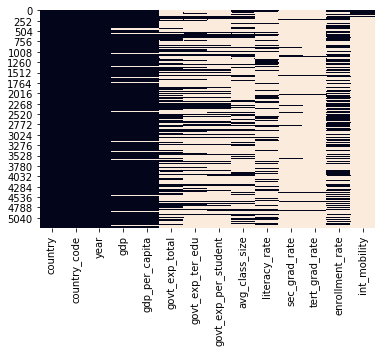

In [23]:
sns.heatmap(df_final.isnull(), cbar=False)

# Data Preparation

- drop columns with too many nulls
- averaging over the past 20 years
- drop regional aggregation

In [24]:
## Grouping by country and taking an average of the last 20 years
df_avg = df_final.groupby(by=['country', 'country_code']).mean()

## Removing columns with too many NaN values
df_avg.drop(columns=['year','sec_grad_rate', 'tert_grad_rate', 'int_mobility', 'literacy_rate'], inplace=True)
df_avg

,,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate
country,country_code,,,,,,,
Afghanistan,AFG,1.400166e+10,443.628992,14.552950,11.813665,77.157660,22.808347,4.619342
Albania,ALB,1.034662e+10,3539.767278,11.016583,20.258418,13.540890,14.491888,39.321906
Algeria,DZA,1.406949e+11,3805.158328,11.428350,26.972610,NaN,27.564334,29.798487
American Samoa,ASM,5.847647e+08,10271.343821,NaN,11.184820,NaN,15.304760,NaN
Andorra,AND,3.005506e+09,38074.895868,19.248905,5.109971,23.791949,4.307496,NaN
...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,8.443258e+09,2176.287592,NaN,NaN,NaN,27.395654,41.444674
World,WLD,6.219837e+13,8898.346591,14.227017,20.489601,29.674678,NaN,29.009130
"Yemen, Rep.",YEM,2.448574e+10,1044.624469,24.433267,NaN,NaN,30.258217,10.470940


In [25]:
df_avg = df_avg.reset_index()

In [26]:
## Removing regions/groups of countries
countries = list(pycountry.countries)
codes = [item.alpha_3 for item in countries]
codes.append('WLD')
for code in df_avg['country_code']:
    if code not in codes:
        df_avg.drop(df_avg[df_avg['country_code']==code].index, inplace=True)
df_avg = df_avg.reset_index()
df_avg.drop(columns=['index'], axis=1, inplace=True)

df_avg

,country,country_code,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate
0,Afghanistan,AFG,1.400166e+10,443.628992,14.552950,11.813665,77.157660,22.808347,4.619342
1,Albania,ALB,1.034662e+10,3539.767278,11.016583,20.258418,13.540890,14.491888,39.321906
2,Algeria,DZA,1.406949e+11,3805.158328,11.428350,26.972610,NaN,27.564334,29.798487
3,American Samoa,ASM,5.847647e+08,10271.343821,NaN,11.184820,NaN,15.304760,NaN
4,Andorra,AND,3.005506e+09,38074.895868,19.248905,5.109971,23.791949,4.307496,NaN
...,...,...,...,...,...,...,...,...,...
211,West Bank and Gaza,PSE,8.443258e+09,2176.287592,NaN,NaN,NaN,27.395654,41.444674
212,World,WLD,6.219837e+13,8898.346591,14.227017,20.489601,29.674678,NaN,29.009130
213,"Yemen, Rep.",YEM,2.448574e+10,1044.624469,24.433267,NaN,NaN,30.258217,10.470940
214,Zambia,ZMB,1.669787e+10,1154.105219,11.348843,16.049818,NaN,NaN,4.142450


In [27]:
## Removing any row with an NaN value
# df_avg.dropna(axis=0, inplace=True)
# df_avg = df_avg.reset_index()

In [28]:
df_avg.set_index('country', inplace=True)

### View nulls in summary df

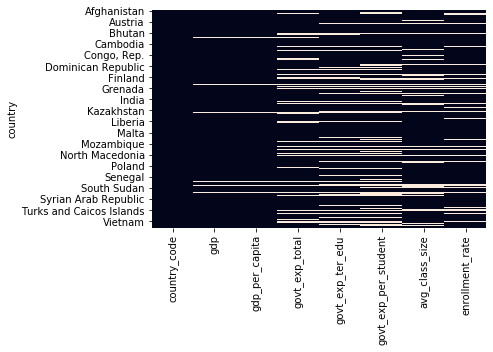

In [29]:
## Heatmap to show Null values after dropping insufficient columns and aggregation
sns.heatmap(df_avg.isnull(), cbar=False)

#### Summary attributes (* shows significance)
1. Economic
    - gdp_per_capita *
    - gov exp ter edu
    - gov exp tot
2. Education 
    - enrolment rate *
    - avg class size
    - gov exp per student *

# K-means WITHOUT UMAP

NOTE: dropped all countries with any null attributes

### Determining optimal number of clusters

In [31]:
x = df_avg[['gdp_per_capita','govt_exp_total', 'govt_exp_ter_edu', 'govt_exp_per_student', 'avg_class_size', 'enrollment_rate']].dropna().to_numpy()
inertias = []
for k in range(1,21):
    model = KMeans(n_clusters = k, init='k-means++')
    model.fit(x)
    inertias.append(model.inertia_)

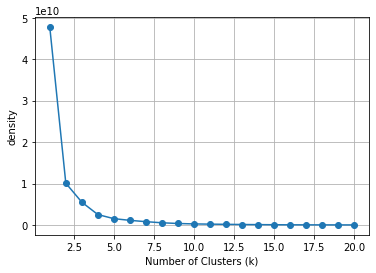

In [32]:
plt.plot(list(range(1,21)), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('density')
plt.grid()
plt.show()

### Building K Means model

In [33]:
model = KMeans(n_clusters = 5, init='k-means++')
model.fit(x)
labels = model.predict(x)

### DataFrame with clusters and metrics

In [34]:
# df_clusters = df_avg.dropna().loc[:,['country', 'country_code']]
# df_clusters['cluster'] = labels
# df_clusters.sort_values(['cluster', 'country'], inplace=True)
# df_clusters.reset_index(inplace=True)
# df_clusters.drop(columns='index', inplace=True)
# df_clusters
#

df_clusters = df_avg.dropna()
df_clusters['cluster'] = labels
df_clusters

C:\Users\sherv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,country_code,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate,cluster
country,,,,,,,,,
Afghanistan,AFG,1.400166e+10,443.628992,14.552950,11.813665,77.157660,22.808347,4.619342,2
Albania,ALB,1.034662e+10,3539.767278,11.016583,20.258418,13.540890,14.491888,39.321906,2
Angola,AGO,7.648371e+10,3051.086985,7.346748,8.492410,76.489230,22.832085,4.760963,2
Antigua and Barbuda,ATG,1.190054e+09,13553.901264,9.314840,7.035955,15.483450,7.043373,17.917172,0
Argentina,ARG,3.849429e+11,9262.576847,15.014792,18.736804,15.062717,15.599488,71.631218,0
...,...,...,...,...,...,...,...,...,...
United States,USA,1.526305e+13,49368.452906,13.313275,27.364720,20.756904,12.279793,89.287110,1
Uruguay,URY,3.704269e+10,10933.826152,10.480199,23.383452,20.693903,7.792752,49.900804,0
Vanuatu,VUT,6.104686e+08,2487.603384,25.952896,7.902240,204.215220,25.030627,4.363418,2


In [35]:
# df_cluster_metric = df_avg.dropna()
# df_cluster_metric['cluster'] = labels

# cols = df_cluster_metric.columns.tolist()
# cols = cols[0:2] + cols[-1:] + cols[2:-1]

# df_cluster_metric = df_cluster_metric.loc[:,cols]
# df_cluster_metric

### Pairplot to determine accuracy of clusters by metric

In [36]:
# sns.pairplot(df_avg, hue='cluster')

### Saving df_cluster_metric to CSV

In [37]:
# df_cluster_metric.to_csv(f'df_cluster_metric.csv')
df_clusters.to_csv(f'df_cluster.csv')

# K-means WITH UMAP

### Scaled before UMAP

In [38]:
reducer = umap.UMAP()

country_data = df_avg[['gdp_per_capita', 'govt_exp_total', 'govt_exp_ter_edu', 'govt_exp_per_student', 'avg_class_size', 'enrollment_rate']].dropna().values
scaled_country_data = StandardScaler().fit_transform(country_data)
embedding = reducer.fit_transform(scaled_country_data)

Text(0.5, 1.0, 'UMAP projection of the Country dataset')

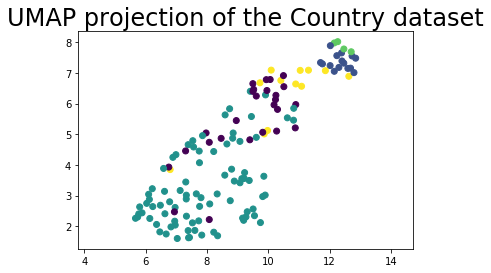

In [39]:
# plt.scatter(embedding[:, 0], embedding[:, 1], c=df_cluster_metric['cluster'])
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_clusters['cluster'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Country dataset', fontsize=24)

### Scaled after UMAP

In [40]:
reducer = umap.UMAP()

country_data = df_avg[['gdp_per_capita', 'govt_exp_total', 'govt_exp_ter_edu', 'govt_exp_per_student', 'avg_class_size', 'enrollment_rate']].dropna().values
# scaled_country_data = StandardScaler().fit_transform(country_data)
embedding = reducer.fit_transform(country_data)


In [41]:
x = embedding
inertias = []
for k in range(1,21):
    model = KMeans(n_clusters = k, init='k-means++')
    model.fit(x)
    inertias.append(model.inertia_)

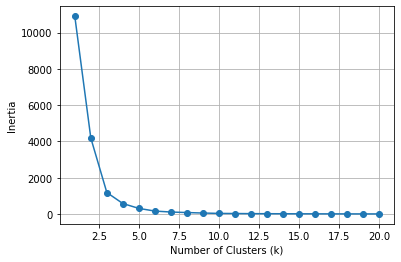

In [42]:
plt.plot(list(range(1,21)), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [43]:
z = embedding
StandardScaler().fit_transform(z)
model = KMeans(n_clusters = 6, init='k-means++')
model.fit(z)
labels_2 = model.predict(z)

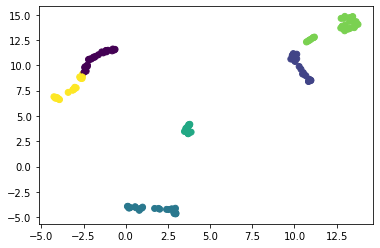

In [44]:
x = [item[0] for item in z]
y = [item[1] for item in z]
plt.scatter(x,y, c=labels_2)
plt.show()

### New clusters by country

In [45]:
# df_clusters2 = df_avg.dropna().loc[:,['country_code']]
# df_clusters2['cluster_UMAPED'] = labels_2
# df_clusters2.sort_values(['new_cluster', 'country'], inplace=True)
# df_clusters2.reset_index(inplace=True)
# df_clusters2.drop(columns='index', inplace=True)
# df_clusters2

### New clusters by country (with all metrics)

In [46]:
# df_cluster_metric2 = df_avg
# df_cluster_metric2['cluster_UMAPED'] = labels_2

# cols = df_cluster_metric2.columns.tolist()
# cols = cols[0:2] + cols[-1:] + cols[2:-1]

# df_cluster_metric2 = df_cluster_metric2[cols]


df_clusters2 = df_avg.dropna()
df_clusters2['cluster_UMAPED'] = labels_2
df_clusters2

C:\Users\sherv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,country_code,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate,cluster_UMAPED
country,,,,,,,,,
Afghanistan,AFG,1.400166e+10,443.628992,14.552950,11.813665,77.157660,22.808347,4.619342,4
Albania,ALB,1.034662e+10,3539.767278,11.016583,20.258418,13.540890,14.491888,39.321906,3
Angola,AGO,7.648371e+10,3051.086985,7.346748,8.492410,76.489230,22.832085,4.760963,3
Antigua and Barbuda,ATG,1.190054e+09,13553.901264,9.314840,7.035955,15.483450,7.043373,17.917172,5
Argentina,ARG,3.849429e+11,9262.576847,15.014792,18.736804,15.062717,15.599488,71.631218,2
...,...,...,...,...,...,...,...,...,...
United States,USA,1.526305e+13,49368.452906,13.313275,27.364720,20.756904,12.279793,89.287110,0
Uruguay,URY,3.704269e+10,10933.826152,10.480199,23.383452,20.693903,7.792752,49.900804,5
Vanuatu,VUT,6.104686e+08,2487.603384,25.952896,7.902240,204.215220,25.030627,4.363418,1


In [47]:
df_clusters2.to_csv(f'cluster_metric2.csv')

### Pairplot, coloured by new clusters

In [48]:
# sns.pairplot(df_cluster_metric2, hue='cluster_UMAPED')

# Assigning clusters to countries with NULL entries

#### drop countries with too many Nulls

In [49]:
ignore_list = []
for country in df_avg.index.values.tolist():
    if df_avg.loc[country,:].isnull().value_counts()[0] <= 3:
        ignore_list.append(country)

for country in df_avg.index.values.tolist():
    try:
        if df_avg.loc[country,['gdp_per_capita','govt_exp_total','govt_exp_ter_edu','govt_exp_per_student','avg_class_size','enrollment_rate']].isnull().value_counts()[False] <= 3:
            ignore_list.append(country)
    except:
        pass
        
df_avg = df_avg[~df_avg.index.isin(ignore_list)]
df_avg

,country_code,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate
country,,,,,,,,
Afghanistan,AFG,1.400166e+10,443.628992,14.552950,11.813665,77.157660,22.808347,4.619342
Albania,ALB,1.034662e+10,3539.767278,11.016583,20.258418,13.540890,14.491888,39.321906
Algeria,DZA,1.406949e+11,3805.158328,11.428350,26.972610,NaN,27.564334,29.798487
Andorra,AND,3.005506e+09,38074.895868,19.248905,5.109971,23.791949,4.307496,NaN
Angola,AGO,7.648371e+10,3051.086985,7.346748,8.492410,76.489230,22.832085,4.760963
...,...,...,...,...,...,...,...,...
Vietnam,VNM,1.242308e+11,1370.858276,16.949080,15.975787,36.345408,26.824426,19.760839
World,WLD,6.219837e+13,8898.346591,14.227017,20.489601,29.674678,NaN,29.009130
"Yemen, Rep.",YEM,2.448574e+10,1044.624469,24.433267,NaN,NaN,30.258217,10.470940


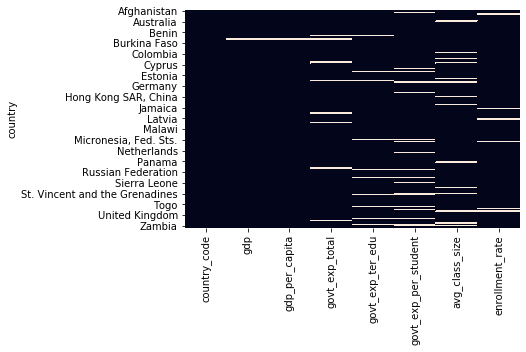

In [50]:
sns.heatmap(df_avg.isnull(), cbar=False)

#### join clustered countries table with non-clustered table

In [51]:
df_avg = df_avg.join(df_clusters2.loc[:,'cluster_UMAPED'], how='left')
df_avg

,country_code,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate,cluster_UMAPED
country,,,,,,,,,
Afghanistan,AFG,1.400166e+10,443.628992,14.552950,11.813665,77.157660,22.808347,4.619342,4.0
Albania,ALB,1.034662e+10,3539.767278,11.016583,20.258418,13.540890,14.491888,39.321906,3.0
Algeria,DZA,1.406949e+11,3805.158328,11.428350,26.972610,NaN,27.564334,29.798487,NaN
Andorra,AND,3.005506e+09,38074.895868,19.248905,5.109971,23.791949,4.307496,NaN,NaN
Angola,AGO,7.648371e+10,3051.086985,7.346748,8.492410,76.489230,22.832085,4.760963,3.0
...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,1.242308e+11,1370.858276,16.949080,15.975787,36.345408,26.824426,19.760839,1.0
World,WLD,6.219837e+13,8898.346591,14.227017,20.489601,29.674678,NaN,29.009130,NaN
"Yemen, Rep.",YEM,2.448574e+10,1044.624469,24.433267,NaN,NaN,30.258217,10.470940,NaN


### find cluster centroids and assign non-clustered countries to nearest clusters

In [52]:
# UMAPED cluster centroids
df_cluster_centroid = df_clusters2.groupby(by='cluster_UMAPED').mean()
df_cluster_centroid

,gdp,gdp_per_capita,govt_exp_total,govt_exp_ter_edu,govt_exp_per_student,avg_class_size,enrollment_rate
cluster_UMAPED,,,,,,,
0,1.194077e+12,47810.646436,13.217490,25.284316,35.351448,12.465025,61.557861
1,1.258759e+11,1773.978384,17.011597,17.257064,80.272174,22.361516,18.502397
2,2.354952e+11,6306.642771,15.182160,18.698489,35.765074,16.093882,40.410509
3,1.713920e+10,3117.542143,15.684247,16.111484,66.279807,15.020171,21.928448
4,2.124813e+10,631.445297,15.374911,18.783690,225.141934,22.459609,7.765730
5,7.323377e+10,15484.779309,12.025466,19.967685,29.082793,13.945715,52.119436


$arg \ min: \sum_i^n \sum_j^k (|| x_i - c_j ||)^2 $

In [53]:
# country = 'France'    
def assign_cluster(country):
    
    dist = {cluster:{col:None for col in df_cluster_centroid.columns} for cluster in df_cluster_centroid.index.to_list()}

    for cluster in df_cluster_centroid.index.to_list():
        for col in df_cluster_centroid.columns:
            if df_avg.loc[country].isnull()[col]:
                pass
            else:
                dist[cluster][col]= (df_avg.loc[country,col]-df_cluster_centroid.loc[cluster,col])**2


        cluster_vals = list(dist[cluster].values())
        while None in cluster_vals:
            cluster_vals.remove(None)
        dist[cluster]['dist_to_cluster'] = (sum(cluster_vals))**0.5


    temp = dist[0]['dist_to_cluster']
    for cluster in dist.keys():
        if dist[cluster]['dist_to_cluster'] >= temp:
            pass
        else:
            temp = dist[cluster]['dist_to_cluster']
            
    for cluster in dist.keys():
        if list(dist.values())[cluster]['dist_to_cluster'] == temp:
            df_avg.loc[country,'cluster_UMAPED'] = cluster
            return f'{country} #assigned# to cluster {cluster}'
        else:
            outpt = f'{country} NOT ASSIGNED  {cluster}'
    return outpt

In [54]:
for country in df_avg.index.to_list():
    for col in df_avg.columns:
        if df_avg.loc[country].isnull()[col]:
            assign_cluster(country)

In [55]:
df_avg.loc[:,'cluster_UMAPED'].isnull().any()

False